# Сравнение классификаторов
---
Мы рассмотрели несколько методов классификации, но практически не говорили о влиянии параметров.

В этой тетрадке ты проведёшь небольшое исследование всех моделей и сравнишь их между собой.

## Загрузка данных и добавление полезных функций
Для удобства визуализации вновь воспользуемся модельными данными.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

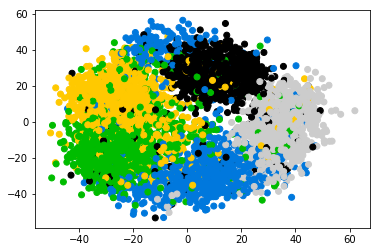

In [2]:
data = numpy.load('data.npz')
X, y = data["X"], data["y"]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='nipy_spectral')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.75, random_state=153)

In [80]:
from sklearn.metrics import accuracy_score

def plot_decision_surface(clf, X, y, plot_step=0.2, cmap='spectral', figsize=(12, 8)):
    # Plot the decision boundary
    plt.figure(figsize=figsize)
    
    n_classes = len(set(y))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, plot_step),
                            numpy.arange(y_min, y_max, plot_step))
    print(numpy.c_[xx.ravel(), yy.ravel()].shape)

    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])
    print("predict1")
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)    
    y_pred = clf.predict(X)
    print("predict2")

    # Plot the training points
    plt.scatter(*X[y_pred == y].T, marker='.', s=70,
                c=y[y_pred == y], cmap=cmap, alpha=0.5, label='correct')
    plt.scatter(*X[y_pred != y].T, marker='x', s=50,
                c=y[y_pred != y], cmap=cmap, label='errors')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis("tight")
    plt.legend(loc='best')
    print("Accuracy =", accuracy_score(y, y_pred))

Задания для каждого классификатора:
- попробуй поменять параметры каждого классификатора, чтобы точность стала лучше:
 * accuracy >= 0.72 - неплохой первый шаг
 * accuracy >= 0.75 - уже лучше, но можно ещё поднажать
 * accuracy >= 0.78 - вполне неплохо
 * accuracy >= 0.8  - или офигенно или очень повезло
- построй графики для каждого классификатора с наилучшим набором параметров
- **при подборе параметров не забывать про кросс-валидацию!**
- сделать выводы, как изменение параметров влияет на границы областей и качество модели

*При подборе параметров рекомендуется использовать GridSearchCV*

## Метод ближайших соседей
Для выполнения этого блока необходимо написать свой метод ближайших соседей и сравнить качество его работы с реализацией sklearn.

In [168]:
class kNNclassifier:
    # done
    def __init__(self, n_neighbors=None, metric=None):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.X = None
        self.y = None
    
    def find_k_nearest_neighbors_(self, sample):
        # найти n_neighbors ближайших соседей для объекта sample
        # по заданной метрике metric
        # your code
   
    def fit(self, X, y):
        # просто сохранить выборку и ответы
        # your code
        
    def predict(self, X):
        # для каждого объекта найти k ближайших соседей и определить по ним класс
        y = []
        # your code
        return numpy.array(y)

Сравните свой класс по скорости работы с sklearn'овским и постарайтесь реализовать как можно больше метрик, поддерживаемых в KNeighborsClassifier.

Полезные параметры метода ближайших соседей (KNeighborsClassifier):
- n_neighbors: число соседей (по умолчанию 5)
- metric: способ измерения расстояния между объектами (по умолчанию euclidian -- обычное расстояние из геометрии,
можно выбирать "euclidean", "manhattan", "chebyshev", "haversine")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## Решающее дерево
У дерева классификации (DecisionTreeClassifier) можно посмотреть изменение следующих параметров:
* criterion: как выбирать лучший признак - 'gini' или 'entropy' (по умолчанию gini)
* max_depth:  максимальная глубина дерева (по умолчанию не ограничено)
* min_samples_split: минимальное количество примеров, которые можно делить дальше (по умолчанию 2)
* min_samples_leaf: минимальное количество примеров в листе (по умолчанию 1).

In [6]:
from sklearn.tree import DecisionTreeClassifier

## Случайный лес
Параметры RandomForestClassifier, стоящие внимания:
- n_estimators: количество деревьев в лесу
- criterion: как выбирать лучший признак - 'gini' или 'entropy' (по умолчанию gini)
- max_features: количество признаков при построении дерева (по умолчанию $\sqrt{\text{количество признаков}}$)
- max_depth: максимальная глубина дерева (по умолчанию не ограничено)
- min_samples_split: минимальное количество примеров, которые можно делить дальше (по умолчанию 2)
- min_samples_leaf: минимальное количество примеров в листе (по умолчанию 1).

In [7]:
from sklearn.ensemble import RandomForestClassifier

## Комбинации классификаторов
Полученные модели могут быть достаточно разными по своей природе. Можно попробовать улучшить качество предсказания за счёт смешивания!

1) Сгенерируй данные для бинарной классификации (метки принимают только два значения -- $0$ или $1$)

2) Выбери любые две модели: обозначим их $clf_1$ и $clf_2$. После этого построй новый классификатор, ответ которого на некотором объекте $x$ (вероятность принадлежности классу) будет выглядеть следующим образом:

$$final\_clf(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha \in [0, 1]$ — гиперпараметр нового классификатора. Класс объекта определяется как $\left[final\_clf(x) > 0.5\right] = \begin{cases}
0, \quad final\_clf(x) \leq 0.5 \\
1, \quad final\_clf(x) > 0.5
\end{cases}$

Подбери значение этого параметра (по-хорошему, надо использовать для этого отложенную выборку! (но в данном случае можно забить))